# Project 1 Data Analysis
Kartik Mohan & Raghav Sharma

## Basics of Dataset

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading dataset
data = pd.read_csv('/content/master.csv')

In [3]:
# look at 1st 5 data points
data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# print the concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
data.shape 

(27820, 12)

In [7]:
# counts total row in each col. that have null values
data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
# most of the HDIForYear value is empty, hence deleting column
data=data.drop(['HDI for year'],axis=1)

In [9]:
data.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [10]:
# The different age groups
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [11]:
# lists the different countries
data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [12]:
# the Number of different Countries our dataset is from
data['country'].nunique()

101

In [13]:
# The different country groups
data['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

In [14]:
# Replace 0 values with, NA
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

# replace Na values with, mean value
mean_value=data['suicides_no'].mean()

data['suicides_no']=data['suicides_no'].fillna(mean_value)

In [15]:
# do same for Popualation
data['population'] = data['population'].replace(0,np.NAN)

# replace Na values with, mean value
mean_value=data['population'].mean()
data['population']=data['population'].fillna(mean_value)

## Distribution of Dataset

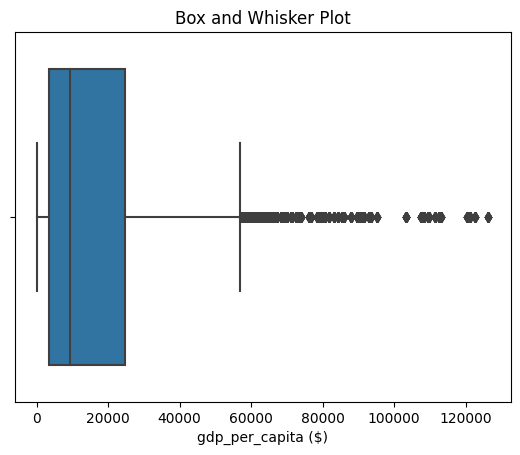

In [16]:
#Add at least one box and whisker plot of an important numerical variable in your table

sns.boxplot(data=data, x='gdp_per_capita ($)')
plt.xlabel('gdp_per_capita ($)')
plt.title('Box and Whisker Plot')
plt.show()

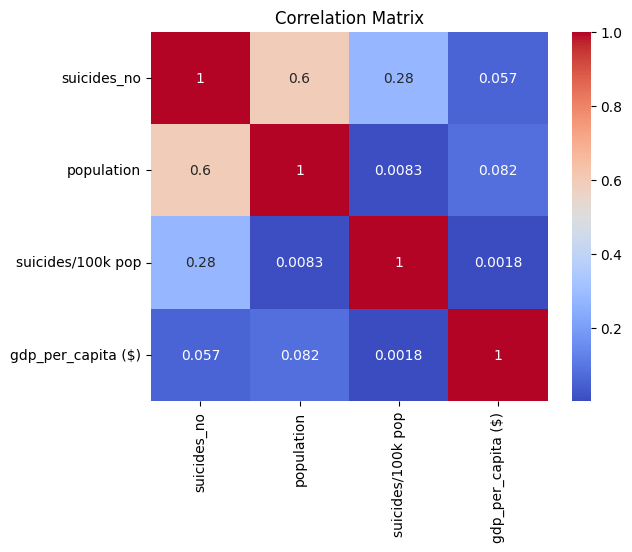

In [17]:
#Add a correlation matrix of all your numerical variables and give written 

# numerical variables
numerical_vars = ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']
correlation_matrix = data[numerical_vars].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Exploratory Data Analysis

### Question 1: Which year has the most and least number of Suicides? 

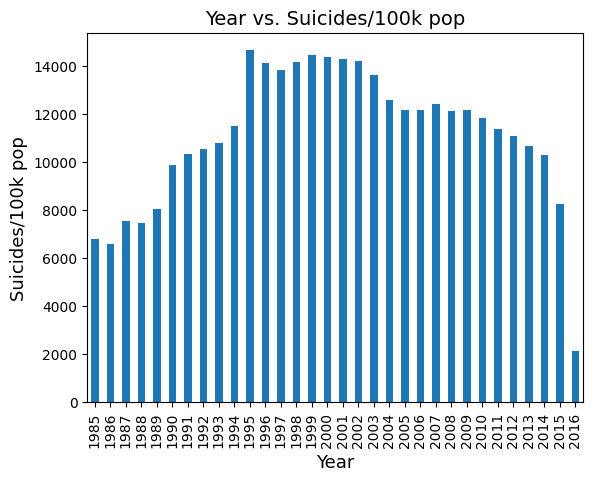

In [18]:
# year-wise analysis of mean number sucidies of each year
data.groupby('year')['suicides/100k pop'].sum().plot(kind='bar')

#setup the title and labels of the figure.
plt.title("Year vs. Suicides/100k pop", fontsize = 14)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Suicides/100k pop', fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")

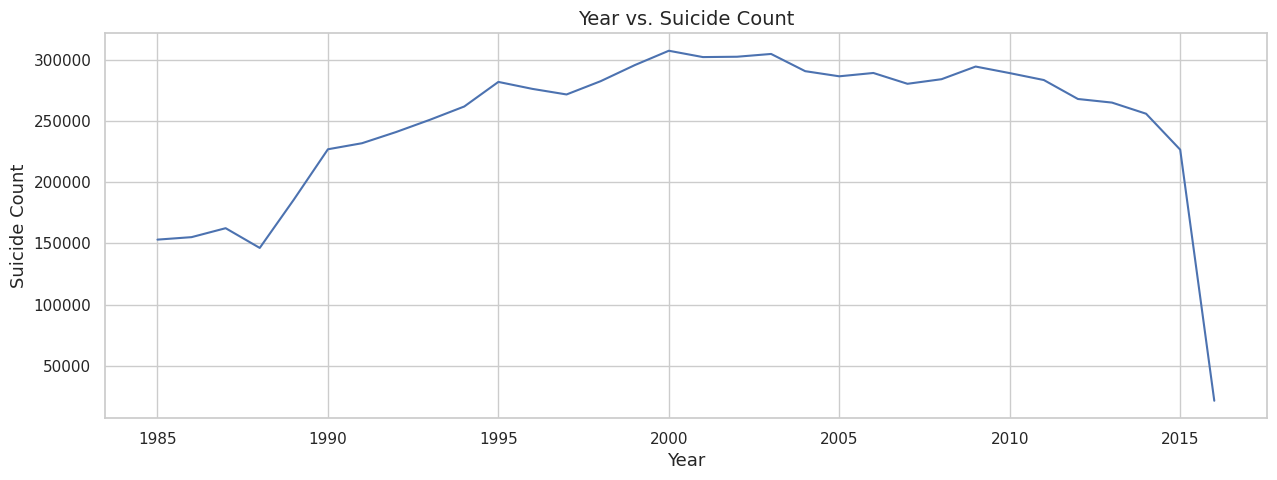

In [19]:
# year-wise analysis of mean number sucidies of each year
data.groupby('year')['suicides_no'].sum().plot()

#setup the title and labels of the figure.
plt.title("Year vs. Suicide Count",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

1995 has the highest suicides.

2016 has the lowest suicides.

### Question 2: Which country has the most and least Suicides ?

Text(0, 0.5, 'Suicides/100k pop')

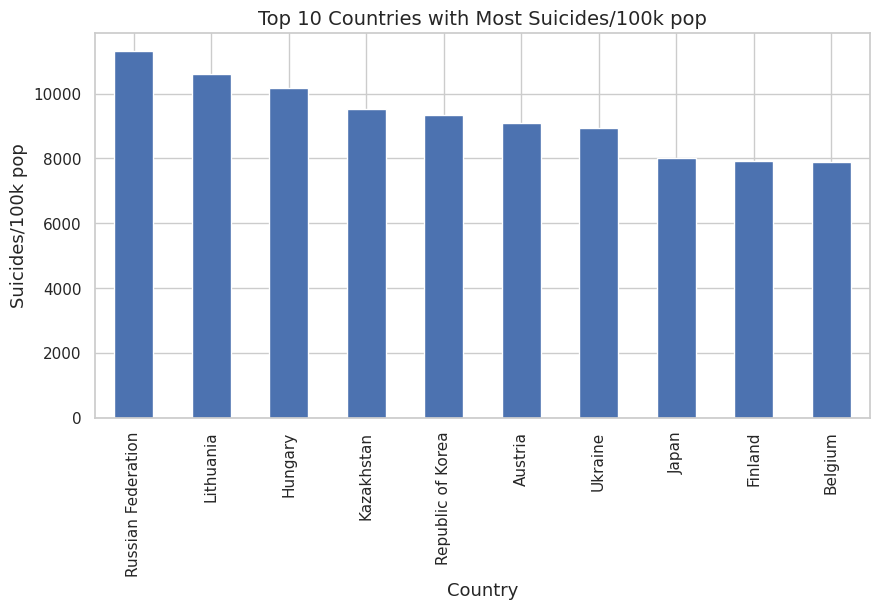

In [20]:
# year-wise analysis of mean number sucidies of each year
data.groupby('country')['suicides/100k pop'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

#setup the title and labels of the figure.
plt.title("Top 10 Countries with Most Suicides/100k pop", fontsize = 14)
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Suicides/100k pop', fontsize = 13)

Text(0, 0.5, 'Suicides/100k pop')

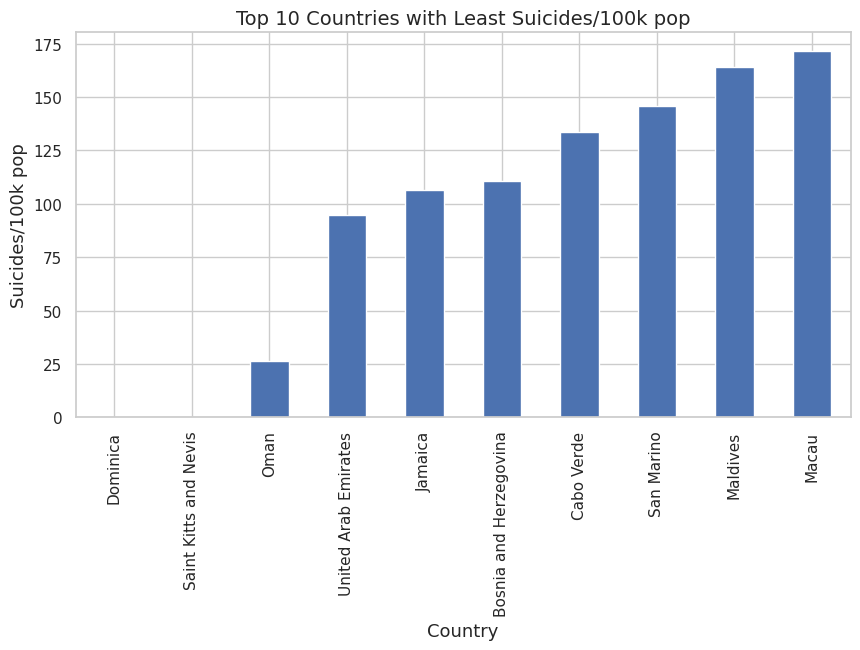

In [21]:
# year-wise analysis of mean number sucidies of each year
data.groupby('country')['suicides/100k pop'].sum().sort_values(ascending=True)[:10].plot(kind='bar')

#setup the title and labels of the figure.
plt.title("Top 10 Countries with Least Suicides/100k pop", fontsize = 14)
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Suicides/100k pop', fontsize = 13)

### Question 3: Yearwise Suicide Count/100k pop. of different Age groups

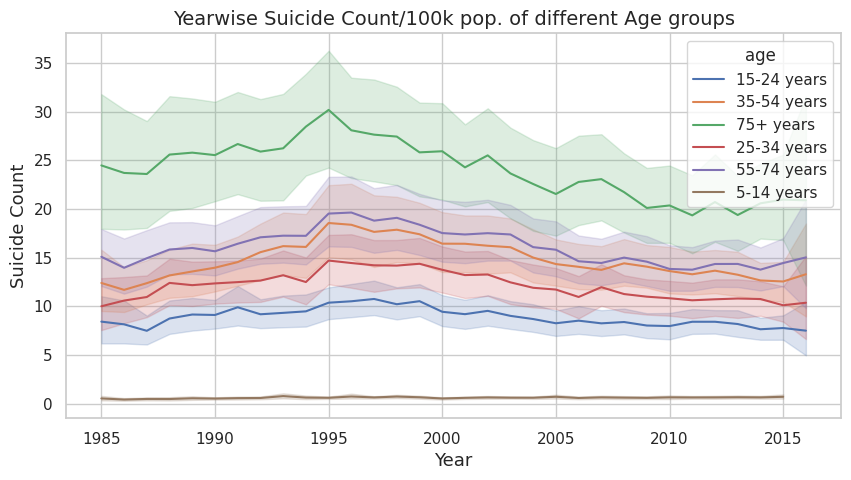

<Figure size 1000x500 with 0 Axes>

In [22]:
sns.lineplot(data=data, x="year", y='suicides/100k pop', hue="age")

# Setup the title and labels of the figure
plt.title("Yearwise Suicide Count/100k pop. of different Age groups", fontsize=14)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Suicide Count', fontsize=13)

# Setup the figure size
plt.figure(figsize=(10, 5))

# Show the plot
plt.show()

### Question 4: Are certain age groups more inclined to suicide?


In [23]:
 # grabs first 2 chars from Age Column
data['AgeNum'] = data['age'].str[:2]

# remove all instances of dash -
data['AgeNum'] = data['AgeNum'].map(lambda x: x.replace('-',''))

# convert to type int (not Object)
data['AgeNum'] = data['AgeNum'].astype(int)
data['AgeNum'].tail(3)

27817     5
27818     5
27819    55
Name: AgeNum, dtype: int64

In [24]:
# creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Elderly"
    elif(x >= 30):
        return "Middle_Aged_Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"
# Map each row in the Col to the AgeGroup Method
data['AgeCategory'] = data['AgeNum'].map(lambda x: AgeGroup(x))
# convert it back to type String
data['AgeCategory'] = data['AgeCategory'].astype(str)
data['AgeCategory'].tail(3)

27817            Adolescent
27818            Adolescent
27819    Middle_Aged_Adults
Name: AgeCategory, dtype: object

Text(7.694444444444452, 0.5, 'Suicide Count')

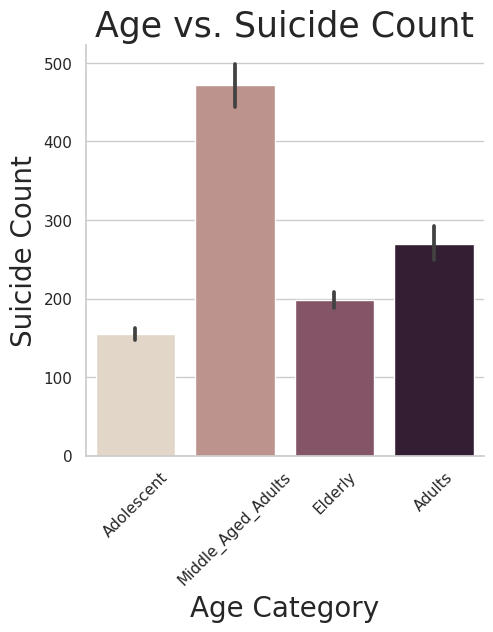

In [25]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=data)
plt.xticks(rotation=45)
plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20)

The data illustrates that middle aged adults, between the ages of 30 through 60, have the highest suicide count. While elderly and adolescents have about half the amount as  middle aged adults.

### Question 4: What is the relationship between the gender and the number of suicides? 

In [26]:
# there is an equal number of Males & Females in our data
data['sex'].value_counts()

male      13910
female    13910
Name: sex, dtype: int64

Text(71.21612499999999, 0.5, 'Number of Suicides')

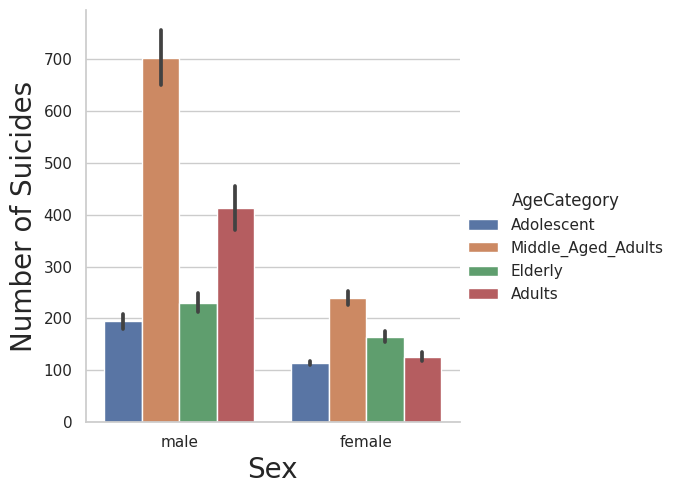

In [27]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=data)
plt.xlabel('Sex',size=20)
plt.ylabel('Number of Suicides',size=20)

Males are more inclined to suicide. 

For Females, the 4 age cateogries seem to level off at 150. 

Both genders show middle aged adults as the leading age group of suicide.